# **Diabetes**

Gruppenmitglieder: Rebeka Ammann, Feben Fasil und Marisa von Fellenberg

### <u>Fragestellungen</u>

- Welche Gesundheitsfaktoren erhöhen das Risiko an Diabetes Typ 2 zu erkranken?
- Wie unterscheidet sich die Diabetes-Prävalenz im Datensatz von den nationalen Prävalenzwerten der USA?

## Erstes Datenset

### <u>1. Datenquelle</u>

https://www.kaggle.com/datasets/nanditapore/healthcare-diabetes?resource=download

### <u>1.1 Daten beschaffen und laden</u>

In [383]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import ConnectionPatch


In [384]:
df = pd.read_csv('data/Healthcare-Diabetes.csv')

In [385]:
df.head()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1


### <u>2. Daten vorbereiten</u>
Das Datenset enthält eine Vielzahl von Risikofaktoren, die mit der Entstehung von Diabetes in Verbindung stehen, sowie allgemeine Gesundheitsdaten wie Alter, Geschlecht und andere relevante Parameter. In der Spalte Outcome ist definiert, ob eine Person Diabetes hat (1) oder nicht (0). Mit Hilfe dieses Datensatzes können wir untersuchen, ob bestimmte Faktoren ein erhöhtes Risiko für die Entwicklung von Diabetes anzeigen. Dies ermöglicht es, frühzeitig potenzielle Risikopatienten zu identifizieren und gegebenenfalls präventive Massnahmen zu ergreifen. 

Es ist wichtig zu beachten, dass sich dieser Datensatz ausschliesslich auf Diabetes Typ 2 konzentriert. Typ 2 Diabetes ist eine erworbene Krankheit, die meist im Erwachsenenalter aufgrund von Lebensstilfaktoren und Alter auftritt. Im Gegensatz dazu ist Typ 1 Diabetes eine Autoimmunerkrankung, welche die Insulin-produzierenden Zellen der Bauchspeicheldrüse angreift. Ein weiterer relevanter Punkt ist, dass alle Personen in diesem Datensatz bereits mit Risikofaktoren für Diabetes identifiziert wurden. Es handelt sich also nicht um eine Stichprobe gesunder Menschen, sondern um eine Population mit bereits erhöhtem Risiko.

- Die Rohdaten liegen im Long-Format vor, jede Zeile repräsentiert einen einzelnen Patienten mit den entsprechenden Gesundheitsdaten
- Für eine bessere Übersicht wird der Datensatz pivotiert und der Durchschnittswert der einzelnen Variabeln ermittelt


In [386]:
df_pivot = df.pivot_table(index='Outcome', 
    values=['Glucose', 'BMI', 'BloodPressure', 'Age', 'Insulin', 'Pregnancies', 'SkinThickness', 'DiabetesPedigreeFunction'], aggfunc='mean')
df_pivot.head()

,Age,BMI,BloodPressure,DiabetesPedigreeFunction,Glucose,Insulin,Pregnancies,SkinThickness
Outcome,,,,,,,,
0,31.111233,30.494989,68.119493,0.433316,110.419604,70.075991,3.204295,19.945485
1,36.987395,35.270378,71.070378,0.543445,141.481092,99.302521,4.769958,22.501050


### <u> 3. Statistik der Rohdaten</u>



Das Datenset umfasst Daten von 2768 Patienten aus den USA und enthält die folgenden Variablen: 
- ID
- Anzahl der Schwangerschaften
- Glukosewerte
- Blutdruck
- Hautdicke
- Insulinwerte
- BMI
- Familiäres Diabetesrisiko
- Alter
- Outcome (Diabetes: Ja/Nein)

In [387]:
df.shape

(2768, 10)

In [388]:
df.dtypes

Id                            int64
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

### <u>3.2 Analyse BMI</u>
Es ist deutlich erkennbar, dass die Mehrheit der Personen in diesem Datenset tendenziell einen erhöhten Body-Mass-Index (BMI) aufweist. Der durchschnittliche BMI der Patienten im Datenset liegt bei 32,1374. Dieser Wert deutet darauf hin, dass viele der im Datenset enthaltenen Personen als übergewichtig oder fettleibig eingestuft werden, da der BMI-Wert von 30 oder mehr allgemein als Schwelle für Übergewicht gilt.

In [389]:
bmi_mean= df["BMI"].mean()
print("BMI Durchschnitt: ",df["BMI"].mean())

BMI Durchschnitt:  32.13739161849711


Die Analyse des Diagramms zeigt, dass es im Datensatz einige Einträge gibt, bei denen der BMI-Wert auf Null gesetzt ist. Diese Null-Werte deuten darauf hin, dass der BMI für diese Patienten nicht erfasst wurde, was den Durchschnittswert verfälscht. Es handelt sich um 39 Patienten, bei denen der BMI fehlt und daher als Null angegeben ist. Wenn diese 39 Patienten aus der Berechnung des Durchschnitts ausgeschlossen werden, ergibt sich ein korrigierter Durchschnitt von 32.6, der den tatsächlichen BMI der restlichen Patienten genauer widerspiegelt.


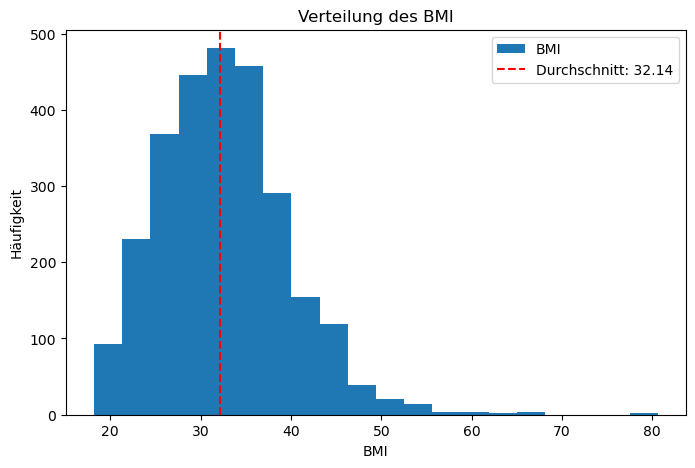

In [390]:
plt.figure(figsize=(8, 5))
df.loc[df["BMI"] != 0, "BMI"].plot(kind='hist', bins=20)
plt.title('Verteilung des BMI')
plt.xlabel('BMI')
plt.ylabel('Häufigkeit')
plt.axvline(bmi_mean, color='red', linestyle='dashed', linewidth=1.5, label=f"Durchschnitt: {bmi_mean:.2f}")
plt.legend(loc='upper right')
plt.show()

In [391]:
unrealistic_bmi_count = (df["BMI"] == 0).sum()
clean_bmi_mean = df.loc[df["BMI"] != 0, "BMI"].mean()
print(f"Anzahl an unrealistischen BMI-Werten: {unrealistic_bmi_count}")
print(f"Bereinigter BMI-Durchschnitt: {clean_bmi_mean:.2f}")

Anzahl an unrealistischen BMI-Werten: 39
Bereinigter BMI-Durchschnitt: 32.60


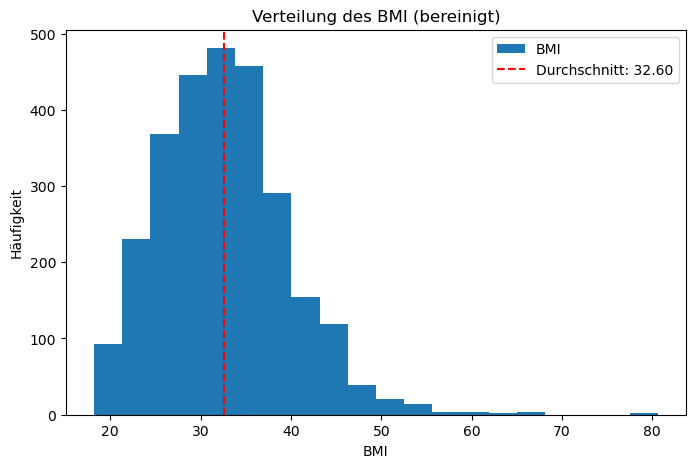

In [392]:
plt.figure(figsize=(8, 5))
df.loc[df["BMI"] != 0, "BMI"].plot(kind='hist', bins=20)
plt.title('Verteilung des BMI (bereinigt)')
plt.xlabel('BMI')
plt.ylabel('Häufigkeit')
plt.axvline(clean_bmi_mean, color='red', linestyle='dashed', linewidth=1.5, label=f"Durchschnitt: {clean_bmi_mean:.2f}")
plt.legend(loc='upper right')
plt.show()

### <u>3.2 Analyse Blutdruck</u>

Der durchschnittliche diastolische Blutdruck im Datensatz liegt bei 69.13 mmHg. Es ist jedoch wichtig zu beachten, dass dieser Durchschnitt auch Blutdruckwerte von 0 mmHg umfasst, die im Datensatz mitinterpretiert werden und so den Durchschnitt verzerren.

In [393]:
blood_pressure_mean = df["BloodPressure"].mean()
print(f"Blutdruck Durchschnitt [mmHg]: {blood_pressure_mean:.2f}")

Blutdruck Durchschnitt [mmHg]: 69.13


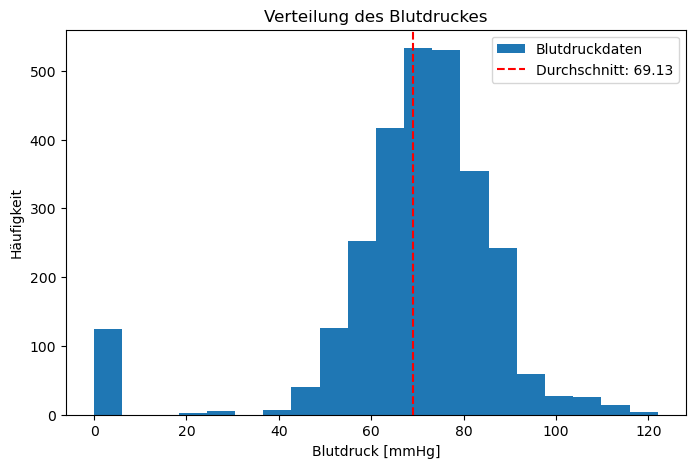

In [394]:
plt.figure(figsize=(8, 5))
df["BloodPressure"].plot(kind='hist', bins=20)
plt.title('Verteilung des Blutdruckes')
plt.xlabel('Blutdruck [mmHg]')
plt.ylabel('Häufigkeit')
plt.axvline(blood_pressure_mean, color='red', linestyle='dashed', linewidth=1.5, label=f"Durchschnitt: {blood_pressure_mean:.2f}")
plt.legend(['Blutdruckdaten', f"Durchschnitt: {blood_pressure_mean:.2f}"], loc='upper right')
plt.show()

Im nachfolgenden Diagramm wurden 125 Null-Werte entfernt, um eine genauere Darstellung des tatsächlichen durchschnittlichen Blutdrucks der Patienten zu ermöglichen. Dieser liegt nach Bereinigung bei 72.4 mmHg.

In [395]:
unrealistic_bp_count = (df["BloodPressure"] == 0).sum()
clean_bp_mean = df.loc[df["BloodPressure"] != 0, "BloodPressure"].mean()
print(f"Anzahl unrealistischer Blutdruck-Werte: {unrealistic_bp_count}")
print(f"Bereinigter Blutdruckdurchschnitt [mmHg]: {clean_bp_mean:.2f}")

Anzahl unrealistischer Blutdruck-Werte: 125
Bereinigter Blutdruckdurchschnitt [mmHg]: 72.40


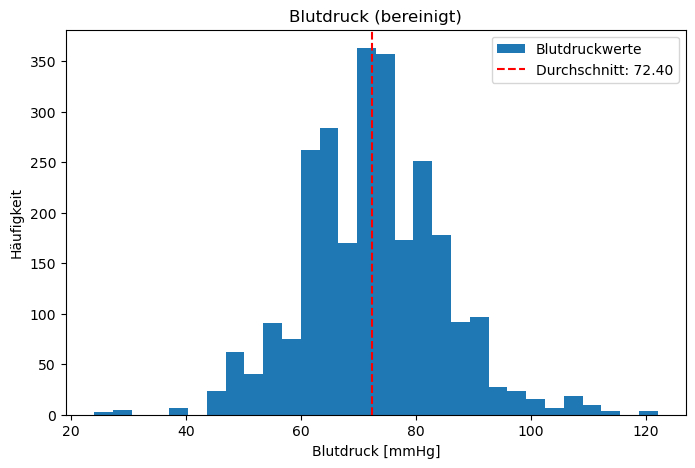

In [396]:
clean_bp_mean = df["BloodPressure"].loc[df["BloodPressure"] != 0].mean()
plt.figure(figsize=(8, 5))
df["BloodPressure"].loc[df["BloodPressure"] != 0].plot(kind='hist', bins=30)
plt.title('Blutdruck (bereinigt)')
plt.xlabel('Blutdruck [mmHg]')
plt.ylabel('Häufigkeit')
plt.axvline(clean_bp_mean, color='red', linestyle='dashed', linewidth=1.5, label=f"Durchschnitt: {clean_bp_mean:.2f}")
plt.legend(['Blutdruckwerte', f"Durchschnitt: {clean_bp_mean:.2f}"], loc='upper right')
plt.show()

### <u>3.3 Analyse Alter</u>
Das Durchschnittsalter der Patienten im Datensatz beträgt 33 Jahre. Dieser Wert wird jedoch durch eine relativ hohe Anzahl sehr junger Patienten beeinflusst. Es ist daher zu beachten, dass viele der Patienten in diesem Datensatz jünger sind, was den Durchschnittswert verzerrt und möglicherweise nicht das typische Alter für Diabetes-Risiken widerspiegelt.

In [397]:
age_raw = df["Age"].mean()
print(f"Altersdurchschnitt (Jahre): {age_raw:.2f}")

Altersdurchschnitt (Jahre): 33.13


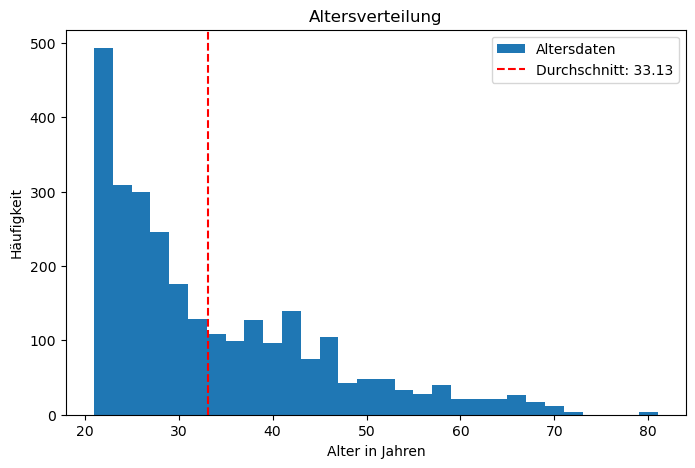

In [398]:
plt.figure(figsize=(8, 5))
df["Age"].plot(kind='hist', bins=30)
plt.title('Altersverteilung')
plt.xlabel('Alter in Jahren')
plt.ylabel('Häufigkeit')
plt.axvline(age_raw, color='red', linestyle='dashed', linewidth=1.5, label=f"Durchschnitt: {age_raw:.2f}")
plt.legend(['Altersdaten', f"Durchschnitt: {age_raw:.2f}"], loc='upper right')
plt.show()

### <u>3.4 Analyse Blutzucker</u>
Der durchschnittliche Blutzuckerwert liegt bei 121.1 mg/dl. Hier fällt erneut auf, dass auch Blutzuckerwerte von 0 mg/dl erfasst wurden. Diese werden im nächsten Schritt bereinigt.

In [399]:
blood_glucose = df["Glucose"].mean()
print(f"Durchschnittlicher Blutzuckerwert [mg/dl]: {blood_glucose:.2f}")

Durchschnittlicher Blutzuckerwert [mg/dl]: 121.10


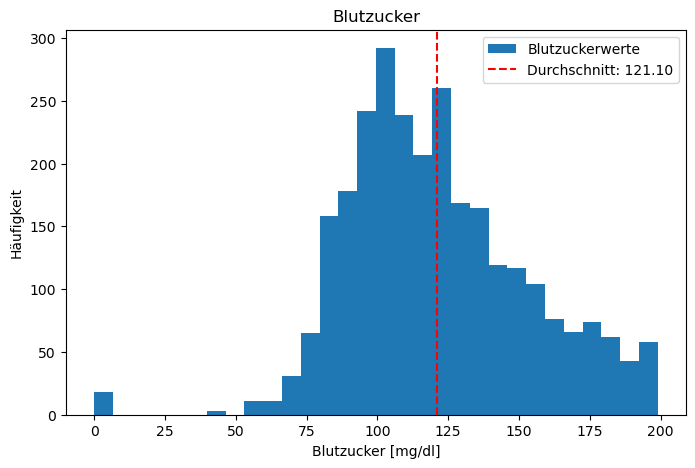

In [400]:
blood_glucose = df["Glucose"].mean()
plt.figure(figsize=(8, 5))
df["Glucose"].plot(kind='hist', bins=30)
plt.title('Blutzucker')
plt.xlabel('Blutzucker [mg/dl]')
plt.ylabel('Häufigkeit')
plt.axvline(blood_glucose, color='red', linestyle='dashed', linewidth=1.5, label=f"Durchschnitt: {blood_glucose:.2f}")
plt.legend(['Blutzuckerwerte', f"Durchschnitt: {blood_glucose:.2f}"], loc='upper right')
plt.show()


Insgesamt finden sich 18 Einträge mit einem Wert von 0 mg/dl. Nach der Bereinigung ergibt sich ein neuer Blutzuckerdurchschnitt von 121.90 mg/dl.

In [401]:
unrealistic_glucose = (df["Glucose"] == 0).sum()
clean_glucose_mean = df.loc[df["Glucose"] != 0, "Glucose"].mean()
print(f"Anzahl unrealistischer Blutzuckerwerte: {unrealistic_glucose}")
print(f"Bereinigter Blutzuckerdurchschnitt [mg/dl]: {clean_glucose_mean:.2f}")

Anzahl unrealistischer Blutzuckerwerte: 18
Bereinigter Blutzuckerdurchschnitt [mg/dl]: 121.90


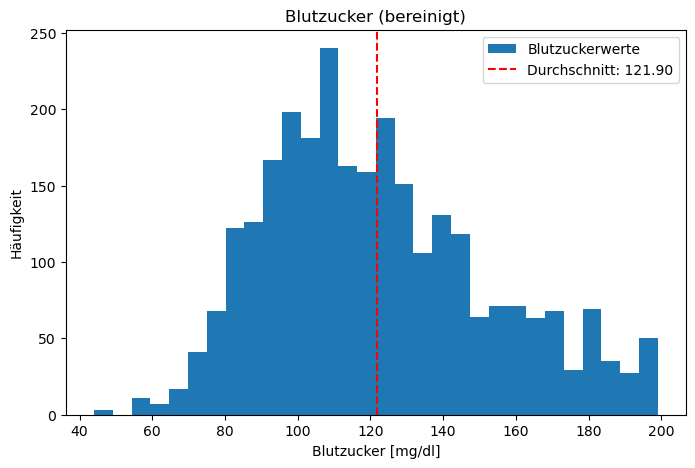

In [402]:
clean_glucose_mean = df["Glucose"].loc[df["Glucose"] != 0].mean()
plt.figure(figsize=(8, 5))
df["Glucose"].loc[df["Glucose"] != 0].plot(kind='hist', bins=30)
plt.title('Blutzucker (bereinigt)')
plt.xlabel('Blutzucker [mg/dl]')
plt.ylabel('Häufigkeit')
plt.axvline(clean_glucose_mean, color='red', linestyle='dashed', linewidth=1.5, label=f"Durchschnitt: {clean_glucose_mean:.2f}")
plt.legend(['Blutzuckerwerte', f"Durchschnitt: {clean_glucose_mean:.2f}"], loc='upper right')
plt.show()

### <u>4. Berechnungen und Visualisierung</u>
Im Datensatz sind 34,4 % der Patienten diabetes-positiv, während 65,6 % als diabetes-negativ klassifiziert werden. Diese Verteilung verdeutlicht, dass ein erheblicher Anteil der erfassten Patienten bereits an Diabetes leidet, was auf das Vorhandensein von Risikofaktoren in dieser Population hinweist. Die verbleibenden 65,6 % der Patienten, die nicht an Diabetes erkrankt sind, stellen eine wertvolle Vergleichsgruppe dar.

In [403]:
def sum_of_positive ():
    positive = 0
    for result in df["Outcome"]:
        if result == 1:
            positive = positive + 1
    return positive
nr_of_positives = sum_of_positive()
total_outcomes = len(df["Outcome"])
precentage_positive = (nr_of_positives/total_outcomes)*100
print("Patienten mit Diabetes [%]:",precentage_positive)

Patienten mit Diabetes [%]: 34.39306358381503


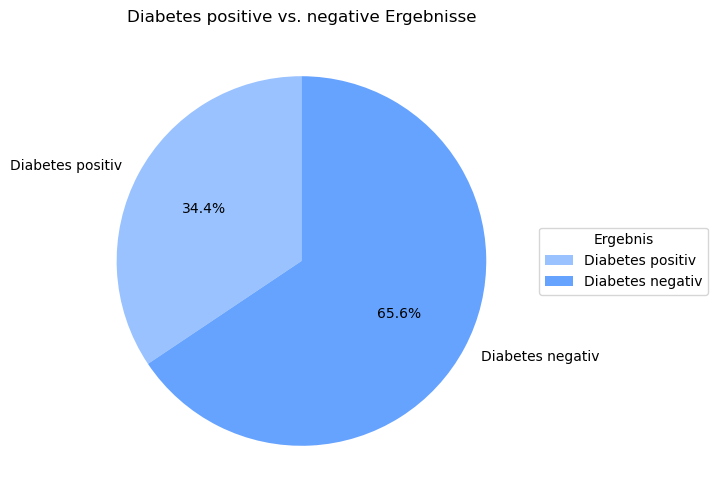

In [404]:
labels = "Diabetes positiv", "Diabetes negativ"
sizes = [nr_of_positives, total_outcomes - nr_of_positives]
colors = ['#99c2ff', '#66a3ff']
fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(sizes, labels=labels, autopct="%1.1f%%", startangle=90, colors=colors, wedgeprops={'linewidth': 1.2})
ax.legend(labels, title = "Ergebnis", loc= "center left", bbox_to_anchor=(1,0.5))
ax.set_title("Diabetes positive vs. negative Ergebnisse")
plt.show()

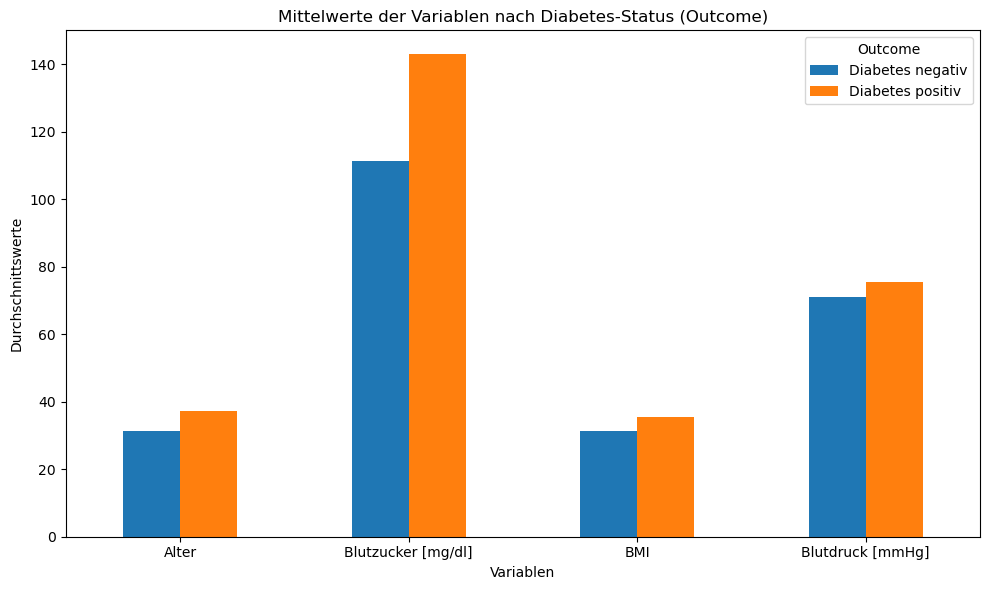

In [405]:
df = pd.read_csv('data/Healthcare-Diabetes.csv')
variables = ['Age', 'Glucose', 'BMI', 'BloodPressure']
df_clean = df[(df['BMI'] > 0) & (df['BloodPressure'] > 0) & (df['Glucose'] > 0)]
mean_values = df_clean.groupby('Outcome')[variables].mean()
variable_names_german = ['Alter', 'Blutzucker [mg/dl]', 'BMI', 'Blutdruck [mmHg]']
mean_values.T.plot(kind='bar', figsize=(10, 6))
plt.title('Mittelwerte der Variablen nach Diabetes-Status (Outcome)')
plt.xlabel('Variablen')
plt.ylabel('Durchschnittswerte')
plt.xticks(ticks=range(len(variable_names_german)), labels=variable_names_german, rotation=0)
plt.legend(title='Outcome', labels=['Diabetes negativ', 'Diabetes positiv'])
plt.tight_layout()
plt.show()

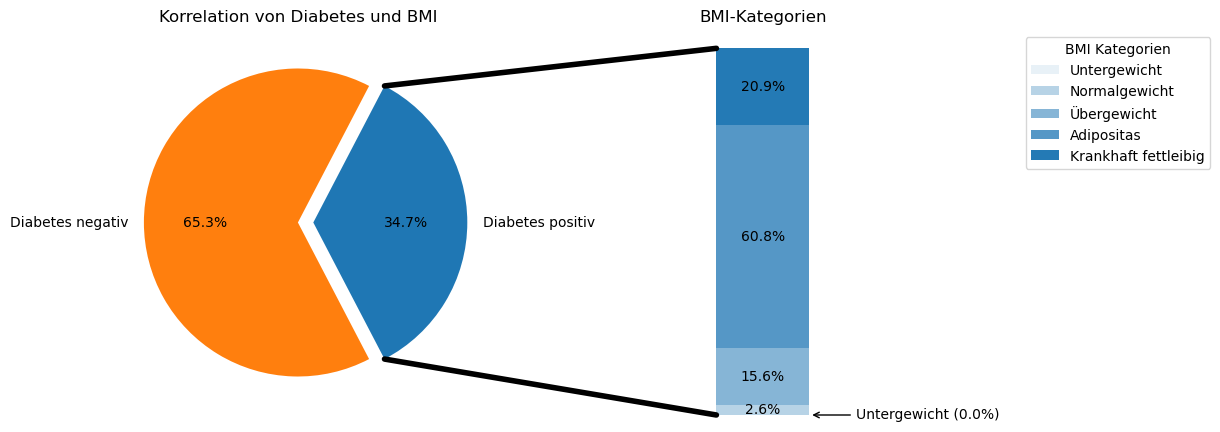

In [406]:
df_non_zero = df[df['BMI'] > 0]

positive_count = (df_non_zero['Outcome'] == 1).sum()
negative_count = (df_non_zero['Outcome'] == 0).sum()
total = positive_count + negative_count

positive_ratio = positive_count / total
negative_ratio = negative_count / total

def get_bmi_category(bmi):
    if bmi < 18.5:
        return 'Untergewicht'
    elif bmi < 25:
        return 'Normalgewicht'
    elif bmi < 30:
        return 'Übergewicht'
    elif bmi < 40:
        return 'Adipositas'
    else:
        return 'Krankhaft fettleibig'

positive_df = df_non_zero[df_non_zero['Outcome'] == 1].copy()
positive_df['BMI_Category'] = positive_df['BMI'].apply(get_bmi_category)

bmi_counts = positive_df['BMI_Category'].value_counts()
bmi_ratios = bmi_counts / bmi_counts.sum()

bmi_categories_order = ['Untergewicht', 'Normalgewicht', 'Übergewicht', 'Adipositas', 'Krankhaft fettleibig']
bmi_ratios_ordered = [bmi_ratios.get(cat, 0) for cat in bmi_categories_order]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
fig.subplots_adjust(wspace=0)

labels = ['Diabetes positiv', 'Diabetes negativ']
ratios = [positive_ratio, negative_ratio]
explode = [0.1, 0]
angle = -180 * ratios[0]

wedges, *_ = ax1.pie(ratios, autopct='%1.1f%%', startangle=angle,
                     labels=labels, explode=explode, colors=['C0', 'C1'])
ax1.set_title("Korrelation von Diabetes und BMI")

width = 0.5
bottom = 0

for j, (height, category) in enumerate(zip(bmi_ratios_ordered, bmi_categories_order)):
    bc = ax2.bar(0, height, width, bottom=bottom, color='C0',
                 alpha=0.1 + 0.22 * j, label=category)
    label_text = f"{category} ({height:.1%})"
    bar_center = bottom + height / 2.0
    
    if height < 0.02:
        ax2.annotate(
            label_text,                      
            xy=(0 + width/2, bar_center),    
            xytext=(0.5, bar_center),        
            arrowprops=dict(arrowstyle="->", lw=1),
            va='center'
        )
    else:
        ax2.bar_label(bc, labels=[f"{height:.1%}"], label_type='center')
    
    bottom += height

ax2.set_title("BMI-Kategorien")
ax2.legend(title='BMI Kategorien', bbox_to_anchor=(1.05, 1), loc='upper left')
ax2.axis('off')
ax2.set_xlim(-2.5 * width, 2.5 * width)

positive_wedge = wedges[0]
theta1, theta2 = positive_wedge.theta1, positive_wedge.theta2
center, r = positive_wedge.center, positive_wedge.r
bar_height = sum(bmi_ratios_ordered)

x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = r * np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(-width / 2, bar_height), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
con.set_linewidth(4)
ax2.add_artist(con)

x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = r * np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA=(-width / 2, 0), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
ax2.add_artist(con)
con.set_linewidth(4)

plt.show()


### <u>Interpretation</u>

Die Analyse zeigt, dass Personen mit einem positiven Diabetes-Ergebnis einen signifikant erhöhten BMI aufweisen. Der überwiegende Teil dieser Personen ist übergewichtig, mit nur etwa 3 % der Patienten, die im Normalgewichtsbereich liegen. Etwa 21 % gelten sogar als krankhaft fettleibig. Allerdings muss bei dieser Interpretation beachtet werden, dass der durchschnittliche BMI der gesamten Population bereits bei rund 33 liegt, was im Allgemeinen auf Übergewicht hinweist. Dies bedeutet, dass die gesamte Patientengruppe ein erhöhtes Gewicht aufweist. 

Trotzdem zeigt die Analyse, dass der BMI bei Diabetes-positiven Patienten signifikant erhöht ist, was ein weiterer Hinweis auf den Zusammenhang zwischen Übergewicht und dem Risiko für die Entwicklung von Diabetes sein könnte. Es sollte jedoch auch berücksichtigt werden, dass dies nur ein Durchschnittswert darstellt und weitere Faktoren, wie z. B. individuelle Lebensstile und genetische Prädispositionen, ebenfalls eine Rolle spielen. 

Zusammengefasst lässt sich sagen, dass es zwar keine ungewöhnlich hohen BMI-Werte gibt, die Werte bei den Diabetes-positiven Patienten dennoch einen überdurchschnittlich hohen BMI aufweisen, was eine wichtige Erkenntnis darstellt.

## Zweites Datenset

### <u>5.1 Datenquelle</u>

https://ourworldindata.org/grapher/diabetes-prevalence

### <u>5.2 Daten beschaffen und laden</u>

In [407]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import ConnectionPatch

In [408]:
data_worldwide = pd.read_csv('data/diabetes-prevalence.csv')

In [409]:
data_worldwide.head()

,Entity,Code,Year,Diabetes prevalence (% of population ages 20 to 79)
0,Afghanistan,AFG,2011,7.6
1,Afghanistan,AFG,2021,10.9
2,Albania,ALB,2011,2.8
3,Albania,ALB,2021,10.2
4,Algeria,DZA,2011,7.0


### <u>6. Datenvorbereitung</u>

Die Datenquelle enthält Informationen zur weltweiten Prävalenz von Diabetes in der Bevölkerung, wobei die Daten nach Ländern und Jahren unterteilt sind. Sie bieten einen Überblick darüber, wie sich die Diabetesraten über die Jahre entwickelt haben und ermöglichen Vergleiche zwischen verschiedenen Regionen und Zeiträumen. 

- Die Daten befinden sich im Long-Format
- Für eine besser Übersicht werden die Daten pivotiert
- Es befinden sich 2768 Daten im Datenset

In [410]:
num_records = df.shape[0]
print(f"Anzahl Daten im Datenset: {num_records}")

Anzahl Daten im Datenset: 2768


In [411]:
dw_pivot = data_worldwide.pivot(index='Entity', columns='Year', values='Diabetes prevalence (% of population ages 20 to 79)')
print(dw_pivot)

Year                               2000       2011       2021
Entity                                                       
Afghanistan                         NaN   7.600000  10.900000
Albania                             NaN   2.800000  10.200000
Algeria                             NaN   7.000000   7.100000
American Samoa                      NaN        NaN  20.300000
Andorra                             NaN   5.400000   9.700000
Angola                              NaN   2.900000   4.600000
Antigua and Barbuda                 NaN  12.500000  11.700000
Argentina                           NaN   5.500000   5.400000
Armenia                             NaN   8.500000   5.600000
Aruba                              12.1  12.400000   4.300000
Australia                           0.0   6.600000   6.400000
Austria                             NaN   6.600000   4.600000
Azerbaijan                          NaN   2.800000   5.600000
Bahamas                             NaN  12.100000   8.800000
Bahrain 

### <u>7. Analyse</u>

In [412]:
data_worldwide.dtypes

Entity                                                  object
Code                                                    object
Year                                                     int64
Diabetes prevalence (% of population ages 20 to 79)    float64
dtype: object

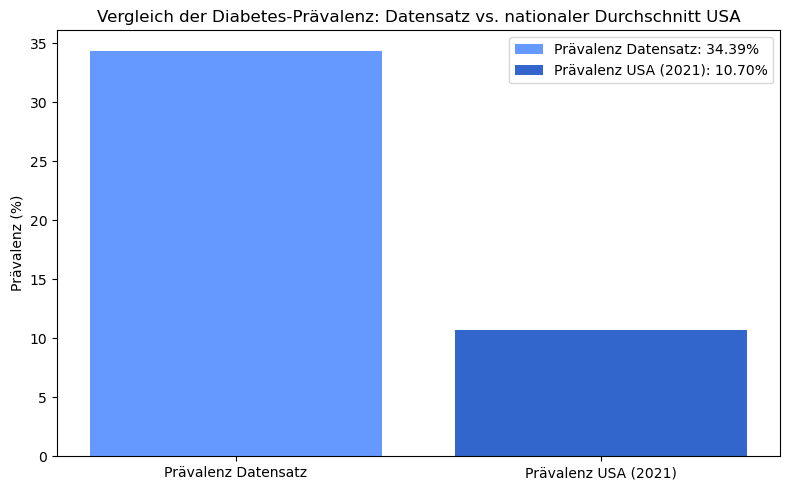

In [420]:
us_2021_df = data_worldwide[(data_worldwide["Code"] == "USA") & (data_worldwide["Year"] == 2021)]
us_2021_mean = us_2021_df["Diabetes prevalence (% of population ages 20 to 79)"].mean()

nr_of_positives = sum_of_positive()
total_outcomes = len(df["Outcome"])
percentage_positive = (nr_of_positives / total_outcomes) * 100

categories = ['Prävalenz Datensatz', 'Prävalenz USA (2021)']
values = [percentage_positive, us_2021_mean]

plt.figure(figsize=(8, 5))
bars = plt.bar(categories, values, color=['#6699ff', '#3366cc'])

plt.legend([bars[0], bars[1]], 
           [f'Prävalenz Datensatz: {percentage_positive:.2f}%', 
            f'Prävalenz USA (2021): {us_2021_mean:.2f}%'], 
           loc='upper right')

plt.title('Vergleich der Diabetes-Prävalenz: Datensatz vs. nationaler Durchschnitt USA')
plt.ylabel('Prävalenz (%)')

plt.tight_layout()
plt.show()